# Probabilistic Dynamic Programming Approach For Car Parking

You can find the proposed solution to the parking problem in the book. This notebook was created to understand how this solution works. It didn't be implemented for a huge space, because it's computationally heavy and it's not the focus of this project.

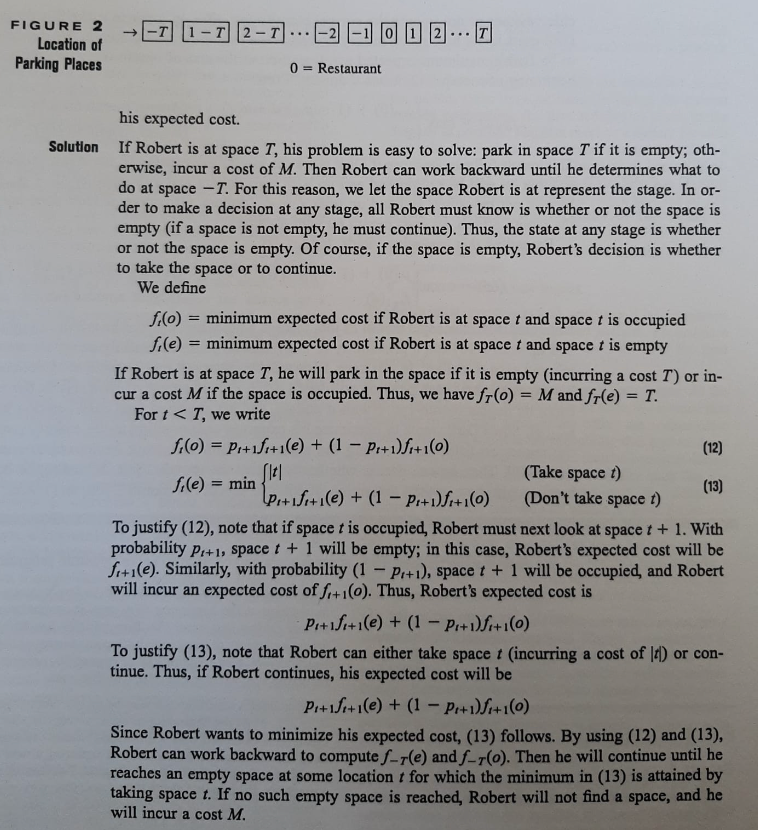

In [1]:
import math

def find_parking(P, M):
    # p includes the probability of the parking space
    
    n = len(P)
    
    #specify the target to calculate the cost, it should be an integer, can be middle of the spaces
    target_index = len(P)//2

    # Initialize the costs list to keep minimum costs
    f_e = [0] * (n)  # Cost table
    f_o = [0] * (n)
    policy = [0] * (n)
    #policy = [0] * (n + 1)  # Policy table

    # M is the cost of not finding a parking space, get this at the end of the parking space

    # Dynamic programming loop
    for t in range(n - 1, -1, -1):
        
        distance = abs(target_index-t) #give cost according to the closeness to the target
        
        if t == (n - 1): #you're in last space or not
            #you're in last parking space
            f_e[t] = distance
            f_o[t] = M
            
        else: 
            
            f_o[t] = P[t+1]*f_e[t+1] + (1 - P[t+1]) * f_o[t+1]
            f_e[t] = min(distance, P[t+1]*f_e[t+1] + (1 - P[t+1]) * f_o[t+1])
                
            if distance < f_o[t]:
                policy[t]=1

        print(f_e)
        print(f_o)
    return policy

# example usage
P = [0.9, 0.1, 0.1, 0.1, 0, 0, 0.1, 0.1]  # example probability distribution #park olma ihtimali
M = 10  # example cost of not finding a parking space

policy = find_parking(P, M)
print("Parking Policy:", policy)

[0, 0, 0, 0, 0, 0, 0, 3]
[0, 0, 0, 0, 0, 0, 0, 10]
[0, 0, 0, 0, 0, 0, 2, 3]
[0, 0, 0, 0, 0, 0, 9.3, 10]
[0, 0, 0, 0, 0, 1, 2, 3]
[0, 0, 0, 0, 0, 8.57, 9.3, 10]
[0, 0, 0, 0, 0, 1, 2, 3]
[0, 0, 0, 0, 8.57, 8.57, 9.3, 10]
[0, 0, 0, 1, 0, 1, 2, 3]
[0, 0, 0, 8.57, 8.57, 8.57, 9.3, 10]
[0, 0, 2, 1, 0, 1, 2, 3]
[0, 0, 7.813, 8.57, 8.57, 8.57, 9.3, 10]
[0, 3, 2, 1, 0, 1, 2, 3]
[0, 7.2317, 7.813, 8.57, 8.57, 8.57, 9.3, 10]
[4, 3, 2, 1, 0, 1, 2, 3]
[6.80853, 7.2317, 7.813, 8.57, 8.57, 8.57, 9.3, 10]
Parking Policy: [1, 1, 1, 1, 1, 1, 1, 0]


As a result, because in most of the places, a probability is 0.1, the policy forces to park in early places.

**THANK YOU!**